In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dfx = pd.read_csv("Datasets/Basic/xdata.csv")
dfy = pd.read_csv("Datasets/Basic/ydata.csv")

In [3]:
X = dfx.values
Y = dfy.values
print(X.shape, Y.shape)

(399, 3) (399, 2)


In [4]:
print(X)

[[ 1.00000000e+00  3.51627900e+00  3.71975047e+00]
 [ 2.00000000e+00  4.60649561e+00  3.41437943e+00]
 [ 3.00000000e+00  4.67701056e+00  3.04724443e+00]
 ...
 [ 3.97000000e+02  7.89625683e-01  9.31669806e-01]
 [ 3.98000000e+02 -1.00253042e+00 -6.76162472e-01]
 [ 3.99000000e+02  2.92386778e-01  5.61177823e-01]]


In [5]:
# First Column in Both X and Y are Index Numbers that we Don't Need

# For all rows drop the first column 
X = X[:,1:]
Y = Y[:,1:]
print(X.shape, Y.shape)

(399, 2) (399, 1)


In [6]:
# Reshaping Y
Y = Y.reshape((-1,))
print(Y.shape)

(399,)


In [7]:
print(Y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

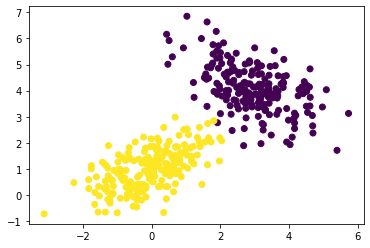

In [8]:
# Plot the Data to visualize
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

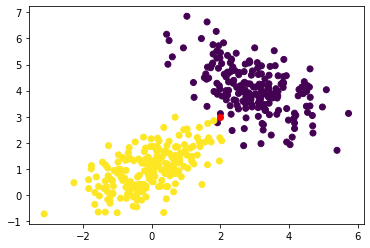

In [9]:
# For a Single Query
query_x = np.array([2,3])
plt.scatter(X[:,0], X[:,1], c=Y)
plt.scatter(query_x[0], query_x[1], color="red")
plt.show()

In [10]:
# Distance Function -> Euclidian Distance

def dist(x1, x2):
    return np.sqrt(sum((x1-x2)**2))

In [11]:
# KNN Function

def knn(X, Y, queryPoint, k=5):
    
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint, X[i])
        vals.append((d, Y[i]))
    
    vals = sorted(vals)
    # Nearest / First K Points
    vals = vals[:k]
    
    vals = np.array(vals)
    
    new_vals = np.unique(vals[:,1], return_counts=True)
    
    max_freq_index = new_vals[1].argmax()
    
    pred = new_vals[0][max_freq_index]
    
    return pred    

In [12]:
x = knn(X, Y, query_x)
print(x)

0.0


In [13]:
print(knn(X, Y, [0,0]))

1.0
